# Some Metrics

## Imports

In [1]:
from glob import glob
import json
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os.path
import pandas as pd

## Setup functions

In [2]:
def get_paths_names_into_directory(directory):
  paths_list_name = glob(f"{directory}*/", recursive = True)
  return paths_list_name

In [3]:
def return_data_from_file(file_path):
  directory = "../data/"
  paths_list = get_paths_names_into_directory(directory)
  
  data = []
  languages_name = []
  
  for path in paths_list:
    complete_path = path + file_path

    if os.path.isfile(complete_path):
      languages_name.append(path.split('/')[2])

      with open(complete_path) as json_file:
        json_data = json.load(json_file)
        data.append(json_data)

  return languages_name, data

## Some Metrics File - Visualization

In [4]:
# This Function get the metrics present in the some_metrics file.
def get_metric_of_interest(metric_name):
  languages_name, metrics_per_languague = return_data_from_file("statistics/some_metrics.json")
  metric_of_interest_per_language = []
  
  for metrics in metrics_per_languague:
    metric_of_interest_per_language.append(metrics[metric_name])
    
  return languages_name, metric_of_interest_per_language

In [5]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

def plot_pizza_graph_format(labels, values):

  colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#fff2a7']

  fig1, ax1 = plt.subplots()
  ax1.pie(values, labels=labels, colors=colors, autopct=autopct_format(values),
       shadow=True, startangle=110)

  ax1.axis('equal')
  plt.show()

In [6]:
def plot_bar_graph_format(labels, values, title, xlabel, ylabel):
  plt.bar(labels, values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#fff2a7'])

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.rcParams["figure.figsize"] = (6,5)

  plt.show()

### Quantity of tokens per language

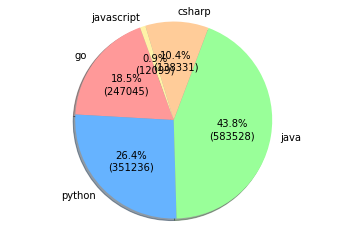

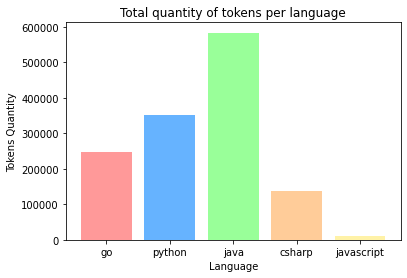

In [7]:
labels, values = get_metric_of_interest("Total quantity of tokens")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Total quantity of tokens per language', 'Language', 'Tokens Quantity')

### Quantity of prefix per language

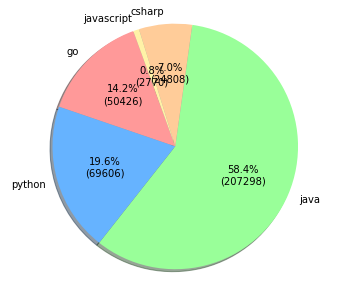

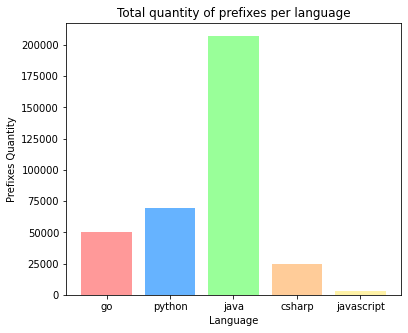

In [8]:
labels, values = get_metric_of_interest("Total quantity of prefixes")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Total quantity of prefixes per language', 'Language', 'Prefixes Quantity')

### Average number of tokens per method

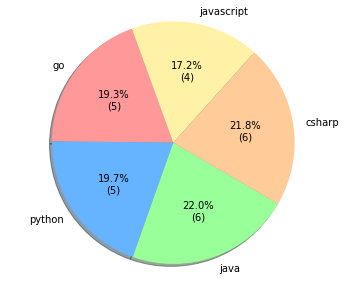

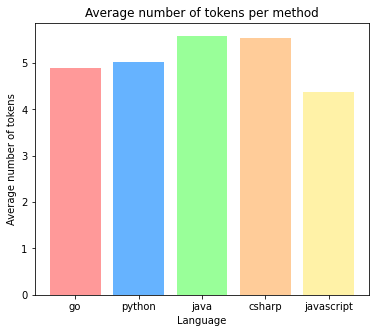

In [9]:
labels, values = get_metric_of_interest("Average number of tokens")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Average number of tokens per method', 'Language', 'Average number of tokens')

### Average number of characters per method

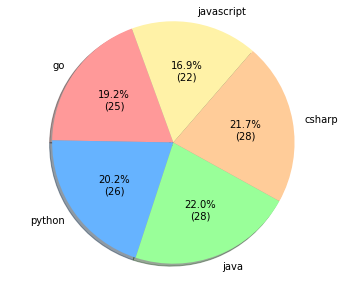

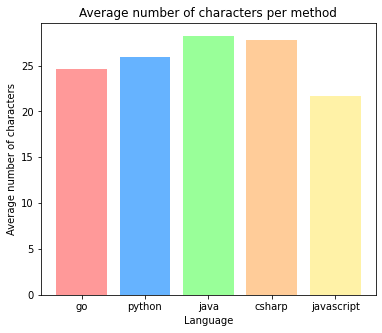

In [10]:
labels, values = get_metric_of_interest("Average number of characters")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Average number of characters per method', 'Language', 'Average number of characters')

### Quantity of tokens of the largest method per language

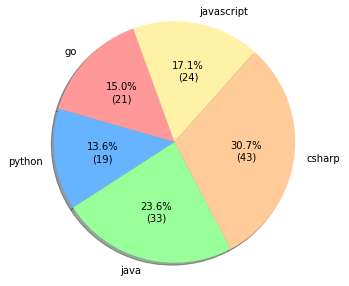

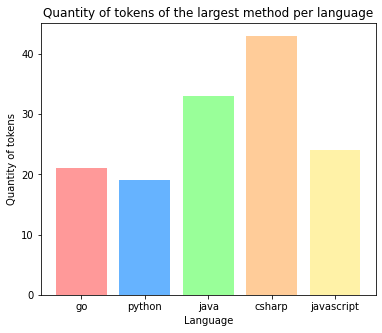

In [11]:
labels, values = get_metric_of_interest("Method with the most quantity of tokens")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Quantity of tokens of the largest method per language', 'Language', 'Quantity of tokens')

### Quantity of characters of the largest method per language

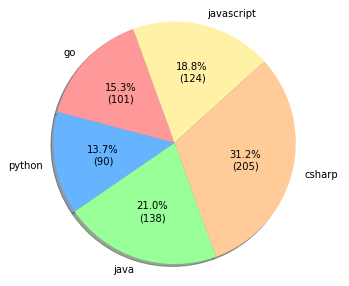

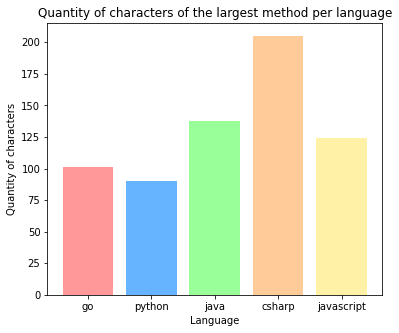

In [12]:
labels, values = get_metric_of_interest("Method with the most quantity of characters")

plot_pizza_graph_format(labels, values)
plot_bar_graph_format(labels, values, 'Quantity of characters of the largest method per language', 'Language', 'Quantity of characters')

## The 20 most common tokens of each language

In [13]:
def get_twenty_most_common_tokens_for_each_language():
  languages_name, tokens_count_per_language = return_data_from_file("tokens/tokens_count_lower.json")
  twenty_tokens_per_language = []
  
  for tokens_dict in tokens_count_per_language:
    first_key = next(iter(tokens_dict))
    if first_key == 'test':
      tokens_dict.pop(first_key)
    twenty_list = list(tokens_dict.items())[:20]    
    twenty_tokens_per_language.append(dict(twenty_list))
    
  return languages_name, twenty_tokens_per_language

In [14]:
def plot_the_twenty_common_tokens_per_language():
  languages_name, tokens_dict_per_language = get_twenty_most_common_tokens_for_each_language()
  it = 0
  
  for tokens_dict in tokens_dict_per_language:
    y_axis = list(tokens_dict.keys())
    x_axis = list(tokens_dict.values())
    y_axis.reverse()
    x_axis.reverse()
    plt.barh(y_axis, x_axis, height = 0.6)

    plt.title(f'The 20 more common tokens in {languages_name[it]}')
    it+=1 

    plt.ylabel('Tokem')
    plt.xlabel('Frequence')
    plt.rcParams["figure.figsize"] = (6,5)

    plt.show()

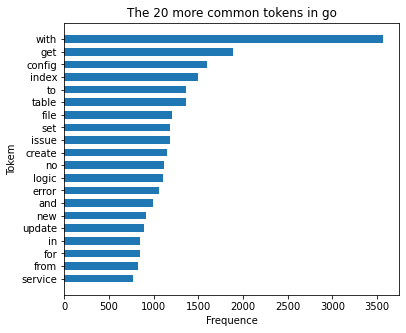

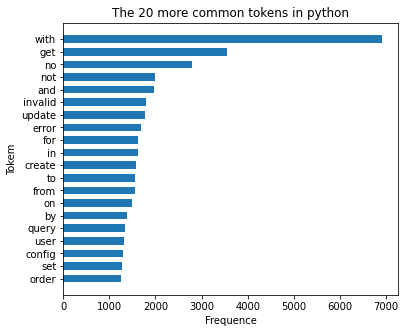

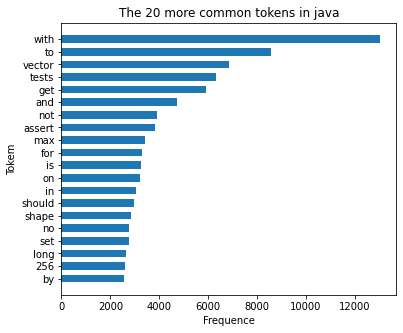

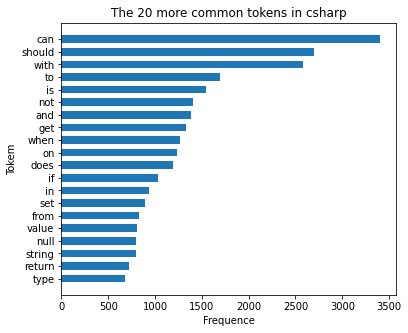

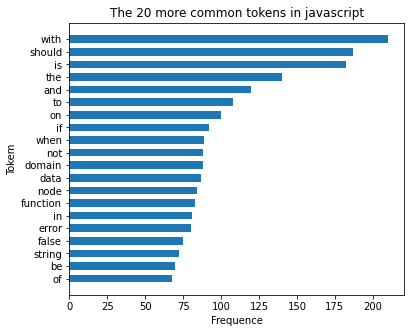

In [15]:
plot_the_twenty_common_tokens_per_language()

## Violin plot visualization

In [16]:
def get_information_per_method(file_of_interest):
  languages_name, information_per_method = return_data_from_file(
    file_of_interest
  )
  
  return languages_name, information_per_method

In [17]:
def plot_violin_distribution(languages_name, data_to_plot, title, ylabel, xlabel):

  # Create a figure instance
  fig = plt.figure()

  # Create an axes instance
  ax = fig.add_axes([0,0,1,1])

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  xticklabels = languages_name
  ax.set_xticks([0.9,1.9,2.9,3.9,4.9])
  ax.set_xticklabels(xticklabels)
  
  # Create the boxplot
  bp = ax.violinplot(data_to_plot, showmedians=True)
  plt.show()

### Quantity of tokens per method for each language

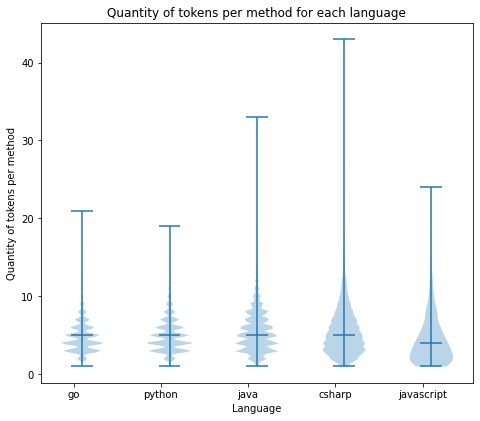

In [18]:
languages_name, quantity_of_tokens_per_method = get_information_per_method(
  "statistics/quantity_of_tokens_per_method.json"
)

plot_violin_distribution(
  languages_name,
  quantity_of_tokens_per_method,
  'Quantity of tokens per method for each language',
  'Quantity of tokens per method',
  'Language'
)

### Quantity of characters per method for each language

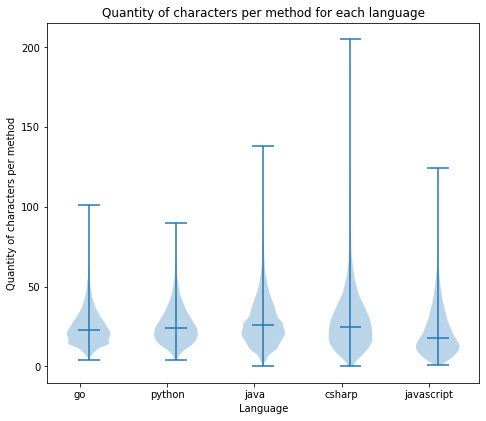

In [19]:
languages_name, quantity_of_characters_per_method = get_information_per_method(
  "statistics/quantity_of_characters_per_method.json"
)

plot_violin_distribution(
  languages_name,
  quantity_of_characters_per_method,
  'Quantity of characters per method for each language',
  'Quantity of characters per method',
  'Language'
)

# POS Tag and Prefix Analysis


Part-of-speech (POS) tagging is the process of categorizing each word in a sentence with its proper morphosyntactic class (verb, noun, adjective, etc).

## Definition table of acronyms used for word classification

In [20]:
data = [["CC", "conjunction, coordinating", "and, both, but, either, for, less"],
        ["CD", "numeral, cardinal", "million, 0.5, mid-1890"],
        ["DT", "determiner", "all, an, another, any, both, del"], 
        ["FW", "foreign word", "deve, debería, devrait"], 
        ["IN", "preposition or conjunction, subordinating", "among, upon, whether, out, inside"],
        ["JJ", "adjective", "first, closer, cutest"], 
        ["MD", "modal auxiliary","can, cannot, could, should"],
        ["NN", "noun", "override, coasts, averages"],
        ["PRP", "pronoun", "herself, him, himself, hisself, it, itself"],
        ["RB", "adverb", "occasionally, greater"],
        ["TO", "\"to\" as preposition or infinitive marker", "to"],
        ["VB", "verb", "assess, begin, break"],
        ["WDT", "Wh-determiner", "that, what, whatever, which"],
        ["WRB", "Wh-adverb", "whence, whenever, where"]
       ]
df = pd.DataFrame(data, columns=["POS Tagging Acronym", "Acronym Definition", "Example"])
df.style.set_properties(**{'text-align': 'center'})

,POS Tagging Acronym,Acronym Definition,Example
0,CC,"conjunction, coordinating","and, both, but, either, for, less"
1,CD,"numeral, cardinal","million, 0.5, mid-1890"
2,DT,determiner,"all, an, another, any, both, del"
3,FW,foreign word,"deve, debería, devrait"
4,IN,"preposition or conjunction, subordinating","among, upon, whether, out, inside"
5,JJ,adjective,"first, closer, cutest"
6,MD,modal auxiliary,"can, cannot, could, should"
7,NN,noun,"override, coasts, averages"
8,PRP,pronoun,"herself, him, himself, hisself, it, itself"
9,RB,adverb,"occasionally, greater"


In [21]:
def get_prefix_of_each_method_per_language():
  languages_name, prefix_of_each_method_per_language = return_data_from_file(
    "statistics/prefix_of_each_method.json"
  )
  
  return languages_name, prefix_of_each_method_per_language

In [22]:
# Function responsible for categorizing each word in a sentence with its proper morphosyntactic class.
def pos_tagging_classification(data_to_rank_for_each_language): 
  pos_tagging_result = []

  for data_list in data_to_rank_for_each_language:
    pos_tagging_result.append(nltk.pos_tag(data_list))

  return pos_tagging_result

In [23]:
# Function responsible for creating a dictionary mapping the main classifications obtained
# to the number of times they appear.
def count_pos_tagging(pos_tagging_list_per_language):
  nouns = ['NNP', 'NN', 'NNS', 'NNPS']
  verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
  adverbs = ['RB', 'RBS', 'RBR']
  adjectives = ['JJ', 'JJR', 'JJS']
  pos_tagging_itens_to_ignore = ['{', '\n', '#', '|', '(', ':']

  pos_tagging_count_result = []

  for pos_tagging_list in pos_tagging_list_per_language:
    count_result = dict()

    for item in pos_tagging_list:
      morphosyntactic_class = item[1]

      if morphosyntactic_class in pos_tagging_itens_to_ignore:
        continue
      if morphosyntactic_class in nouns:
        if 'NN' in count_result:
          count_result['NN'] += 1
        else:
          count_result['NN'] = 1
        continue
      if morphosyntactic_class in verbs:
        if 'VB' in count_result:
          count_result['VB'] += 1
        else:
          count_result['VB'] = 1
        continue
      if morphosyntactic_class in adverbs:
        if 'RB' in count_result:
          count_result['RB'] += 1
        else:
          count_result['RB'] = 1
        continue
      if morphosyntactic_class in adjectives:
        if 'JJ' in count_result:
          count_result['JJ'] += 1
        else:
          count_result['JJ'] = 1
        continue
      if morphosyntactic_class in count_result:
        count_result[morphosyntactic_class] += 1
      else:
        count_result[morphosyntactic_class] = 1

    pos_tagging_count_result.append(count_result)
  return pos_tagging_count_result

In [24]:
# Function that returns a list of dictionaries ordered by value (descending order).
def sorted_list_of_dicts(list_of_dicts_to_sorted):
  sorted_result = []

  for dict_to_sort in list_of_dicts_to_sorted:
    sorted_result.append(
      sorted(dict_to_sort.items(), key=lambda x:x[1], reverse=True)
    )

  return sorted_result

In [25]:
# Get the list of languages and a list of dicts containing the prefix of each method per each language.
languages_name, prefix_of_each_method_per_language = get_prefix_of_each_method_per_language()

# Get the list of dicts containing the pos tagging classification.
pos_tagging_result = pos_tagging_classification(prefix_of_each_method_per_language)

# Get the list of dicts containing the main classifications obtained to the number of times they appear.
pos_tagging_count_result = count_pos_tagging(pos_tagging_result)

# Get the list of pos tagging count ordered by values.
sorted_pos_tagging_count_result = sorted_list_of_dicts(pos_tagging_count_result)

## POS Tag Prefix Analysis

In [26]:
# Function responsible for returning an array with the value of the index passed as param for each element.
def map_tuples_to_index_value(pos_tag_tuples, quantity_to_plot, index):
  return list(map(lambda item: item[index], pos_tag_tuples))[0:quantity_to_plot]

In [27]:
def plot_pos_tagging_classification_graph(sorted_pos_tagging_count_result, languages_name):
  quantity_to_plot = 8

  x_axis = list(
    map(
      lambda pos_tag_tuples: map_tuples_to_index_value(pos_tag_tuples,quantity_to_plot,0),
      sorted_pos_tagging_count_result
    )
  )
  y_axis = list(
    map(
      lambda pos_tag_tuples: map_tuples_to_index_value(pos_tag_tuples,quantity_to_plot,1),
      sorted_pos_tagging_count_result
    )
  )
    
  for i in range(0, len(languages_name)):
    plt.bar(x_axis[i], y_axis[i], color=['#836FFF', '#40E0D0', '#90EE90', '#DAA520', '#9370DB', '#B22222', '#FFD700', '#FF69B4', '#D2691E', '#556B2F'])

    plt.title(f"{languages_name[i]} prefix POS Tag")
    plt.ylabel('Quantity')
    plt.xlabel('Semantic Classification')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.show()

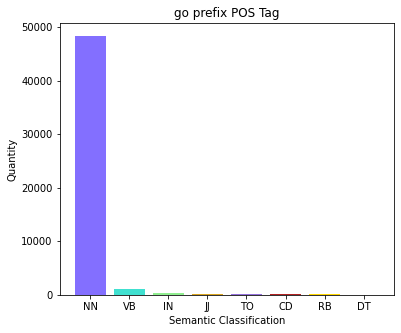

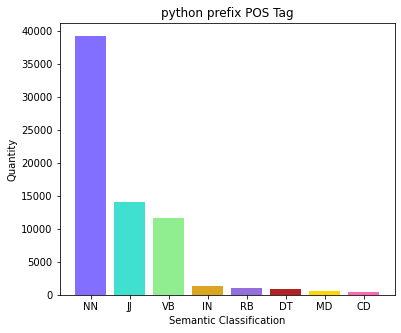

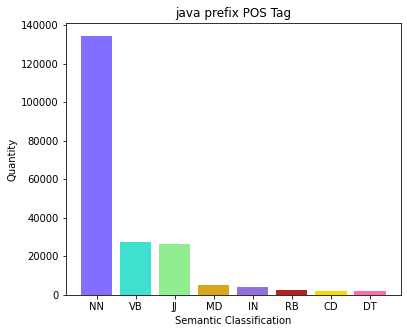

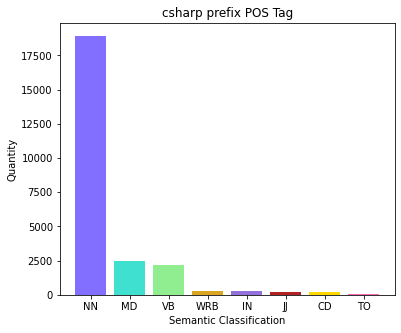

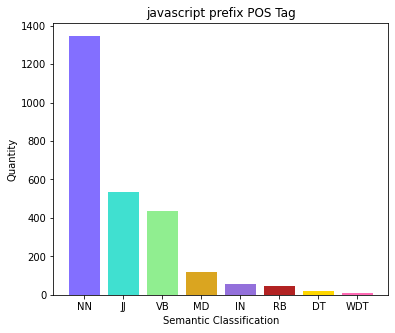

In [28]:
plot_pos_tagging_classification_graph(sorted_pos_tagging_count_result, languages_name)

## Prefix Analysis

In [29]:
# Function responsible for returning the number of times each prefix appeared
# taking into account all the methods of that language.
def get_amount_of_each_prefix(prefix_of_each_method_per_language):
  prefix_list_result = []
  itens_to_ignore = ['{', '\\n', '#', '|', '(', ':', '[']

  for prefix_list in prefix_of_each_method_per_language:
    prefix_dict = {}
    for item in prefix_list:
      item_lower = item.lower()
      if item_lower in itens_to_ignore:
        continue
      if item_lower in prefix_dict:
        prefix_dict[item_lower] += 1
      else:
        prefix_dict[item_lower] = 1
    prefix_list_result.append(prefix_dict)

  return list(sorted_list_of_dicts(prefix_list_result))

In [30]:
def plot_prefix_data_graph(prefix_of_each_method_per_language, languages_name):
  quantity_to_plot = 20
  amount_of_each_prefix = get_amount_of_each_prefix(prefix_of_each_method_per_language)
  
  x_axis = list(
    map(
      lambda prefix_qtd_tuple: map_tuples_to_index_value(prefix_qtd_tuple,quantity_to_plot,0),
      amount_of_each_prefix
    )
  )
  y_axis = list(
    map(
      lambda prefix_qtd_tuple: map_tuples_to_index_value(prefix_qtd_tuple,quantity_to_plot,1),
      amount_of_each_prefix
    )
  )

  for i in range(0, len(languages_name)):
    plt.barh(x_axis[i], y_axis[i], height = 0.5, color=['#836FFF', '#40E0D0', '#90EE90', '#DAA520', '#9370DB', '#B22222', '#FFD700', '#FF69B4', '#D2691E', '#556B2F'])

    plt.title(f"Quantity of times prefixes appeared in language methods (top twenty) - {languages_name[i]}")
    plt.ylabel('Prefix')
    plt.xlabel('Quantity')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.show()

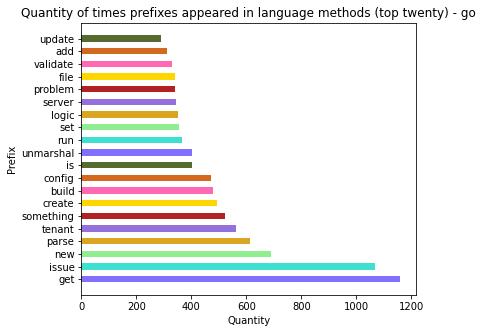

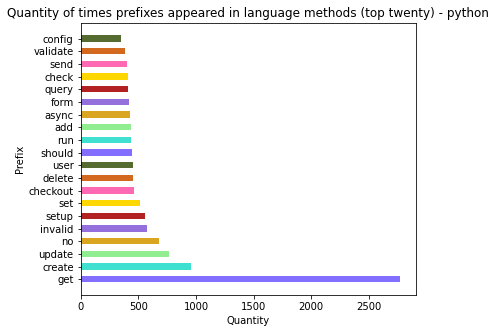

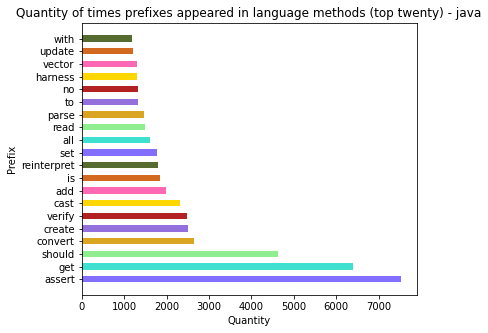

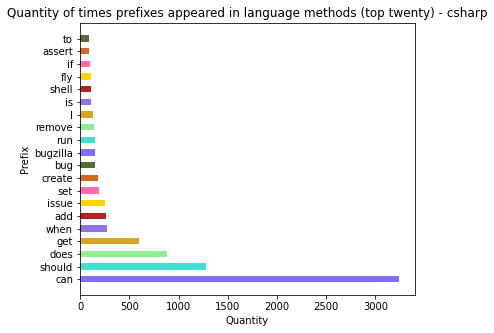

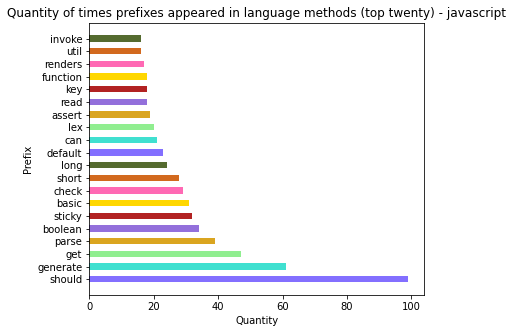

In [31]:
plot_prefix_data_graph(prefix_of_each_method_per_language, languages_name)